<a href="https://colab.research.google.com/github/UyashaISHINI/Cat-Dog-Recognition/blob/main/Dog_Cat_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uyashaishini","key":"2ecfa5965d9b814ad2967e7c289216d5"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-dataset


In [9]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shapes: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shapes: (60000, 28, 28), Test shape: (10000, 28, 28)


In [10]:
X_train = X_train/255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
print(f"Train reshape: {X_train.shape}")

Train reshape: (60000, 28, 28, 1)


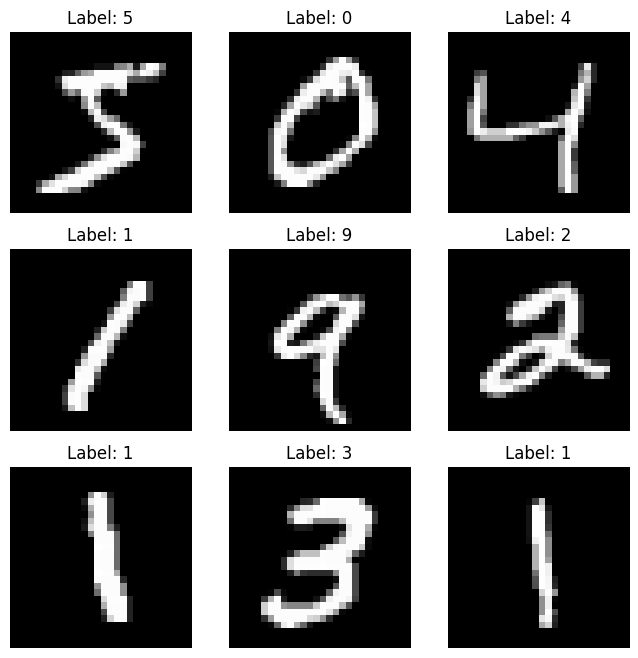

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

for color images

In [12]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8968 - loss: 0.3366 - val_accuracy: 0.9840 - val_loss: 0.0615
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9860 - val_loss: 0.0476
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9866 - val_loss: 0.0433
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9883 - val_loss: 0.0422


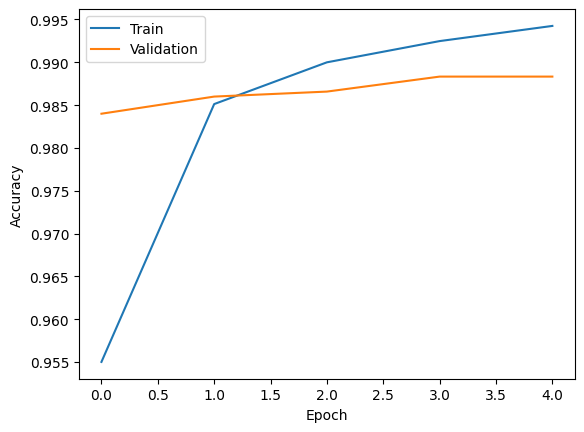

In [15]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9865 - loss: 0.0387
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
     Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Flatten(),
     Dense(256,activation='relu'),
     Dropout(0.5),
     Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32) ,epochs=10, validation_data=[X_test_c10,y_test_c10])

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 73ms/step - accuracy: 0.3330 - loss: 1.8037 - val_accuracy: 0.5495 - val_loss: 1.2601
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.5068 - loss: 1.3837 - val_accuracy: 0.4750 - val_loss: 1.5101
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.5613 - loss: 1.2380 - val_accuracy: 0.5898 - val_loss: 1.1581
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6008 - loss: 1.1441 - val_accuracy: 0.6392 - val_loss: 1.0403
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6230 - loss: 1.0852 - val_accuracy: 0.6242 - val_loss: 1.0675
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6321 - loss: 1.0543 - val_accuracy: 0.6465 - val_loss: 1.0106
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6477 - loss: 1.0202 - val_accuracy: 0.6816 - val_loss: 0.9159
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.6625 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.90      0.79      0.84      1000
           2       0.65      0.46      0.53      1000
           3       0.52      0.32      0.40      1000
           4       0.65      0.46      0.54      1000
           5       0.72      0.45      0.55      1000
           6       0.35      0.97      0.51      1000
           7       0.87      0.61      0.72      1000
           8       0.83      0.78      0.80      1000
           9       0.77      0.82      0.80      1000

    accuracy                           0.64     10000
   macro avg       0.70      0.64      0.64     10000
weighted avg       0.70      0.64      0.64     10000



<function matplotlib.pyplot.show(close=None, block=None)>

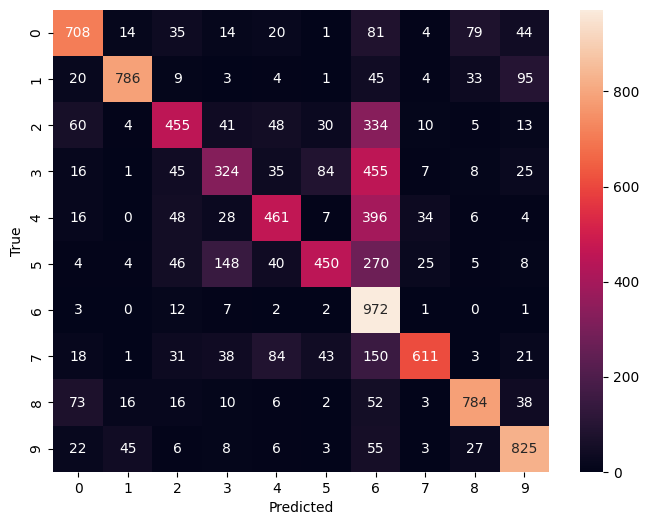

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [21]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 215M/218M [00:00<00:00, 399MB/s] 
100% 218M/218M [00:00<00:00, 430MB/s]


In [22]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),batch_size=32,class_mode='binary',subset='training')

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.7812 - loss: 0.5559 - val_accuracy: 0.7982 - val_loss: 0.4961
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 627s 2s/step - accuracy: 0.7969 - loss: 0.5032 - val_accuracy: 0.7982 - val_loss: 0.4892
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.8040 - loss: 0.4833 - val_accuracy: 0.7986 - val_loss: 0.4730
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.7972 - loss: 0.4782 - val_accuracy: 0.8062 - val_loss: 0.4705
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.8101 - loss: 0.4438 - val_accuracy: 0.8100 - val_loss: 0.4335


In [25]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1749s 7s/step - accuracy: 0.8003 - loss: 0.4853 - val_accuracy: 0.8110 - val_loss: 0.4241
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1722s 7s/step - accuracy: 0.8018 - loss: 0.4566 - val_accuracy: 0.8133 - val_loss: 0.4181
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1776s 7s/step - accuracy: 0.8033 - loss: 0.4332 - val_accuracy: 0.8194 - val_loss: 0.4081


In [26]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

251/251 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step


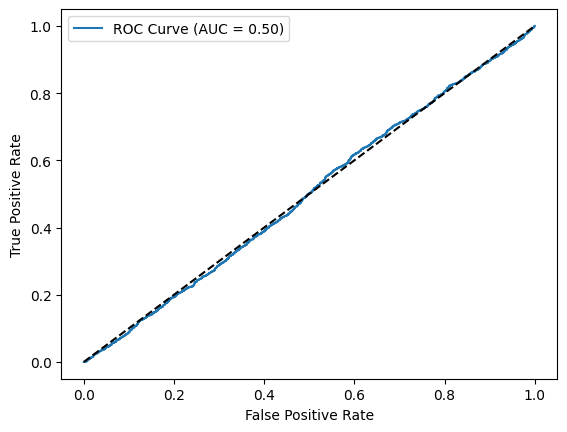

In [28]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [31]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'catimage.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving dogimage.jpg to dogimage.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: Dog


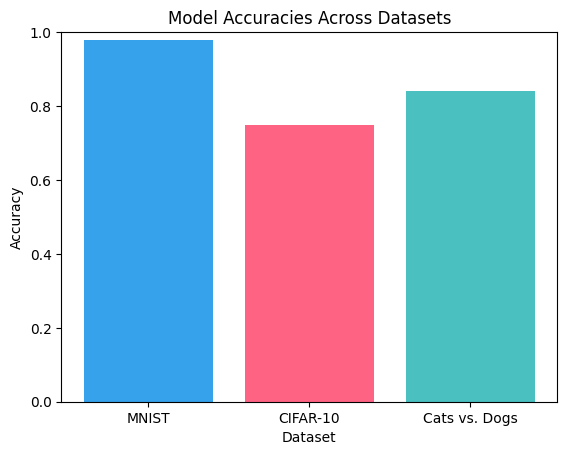

In [32]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()